# INF8225 TP1 H22 (v0.1)

Guillaume - THIBAULT / 1948612

Partie 3 réalisée avec: Pierre-Luc - BOIVIN / 1956183

Date limite : 8h30 le 28 février 2022

Remettez votre fichier Colab sur Moodle en 2 formats: **.pdf** ET **.ipynb**

# Partie 1 (10 points)



## Objectif
L’objectif de la Partie 1 du travail pratique est de permettre à l’étudiant de se familiariser avec les réseaux Bayésiens et la librairie Numpy.

## Problème


<img src="https://drive.google.com/uc?id=1UhYF6_QGTHGpR5VBg-RKvr8jJWJPN12A" alt="bayes_net" width="600"/>


Voici les tables de probabilités conditionnelles fournies:

* La probabilité qu'il est Nuageux: $Pr(N=1)=0.2$
* La probabilité que l'arroseur a été utilisé sachant qu'il est nuageux ou non: $Pr(A=1|N=1)=0.1$, $Pr(A=1|N=0)=0.3$ 
* La probabilité qu'il ait plu, étant donné que le temps est nuageux: $Pr(P=1|N=1)=0.4$, $Pr(P=1|N=0)=0.1$
* La probabilité que le gazon de Watson soit mouillé...
  * ... sachant qu'il a plu est $Pr(W=1|P=1)=1$
  *... sachant qu'il n'a $\textbf{pas}$ plu: $Pr(W=1|P=0)=0.2$
* La probabilité que Holmes remarque que son gazon est mouillé...
  * ... sachant que l’arroseur a fonctionné et qu'il n'a $\textbf{pas}$ plu: $Pr(H=1|P=0, A=1)=0.9$
  * ... sachant que l’arroseur n'a $\textbf{pas}$ fonctionné et qu'il n'a $\textbf{pas}$ plu: $Pr(H=1|P=0, A=0) = 0$
  * ... sachant qu'il a plu, et que l'arroseur ait ou pas fonctionné: $Pr(H=1|P=1, A={0,1})=1$

## Trucs et astuces
Nous utiliserons des vecteurs multidimensionnels `5d-arrays` dont les `axes` représentent:
```
axe 0 : temps nuageux (N)
axe 1 : pluie (P)
axe 2 : arroseur (A)
axe 3 : gazon de watson (W)
axe 4 : gazon de holmes (H)
```
Chaque `axe` serait de dimension `2`:
```
0 : faux
1 : vrai
```
Quelques point à garder en tête:
- Utiliser la jointe comme point de départ pour vos calculs (ne pas développer tous les termes à la main).
- Attention à l'effet du do-operator sur le graphe.
- L'argument "keepdims=True" de "np.sum()" vous permet conserver les mêmes indices.
- Pour un rappel sur les probabilités conditionelles, voir: https://www.probabilitycourse.com/chapter1/1_4_0_conditional_probability.php

## 1. Complétez les tables de probabilités ci-dessous

In [1]:
import numpy as np

# Les tableaux sont bâtis avec les dimensions (N, P, A, W, H)
# et chaque dimension est (False, True)

Pr_N = np.array([0.8, 0.2]).reshape(2, 1, 1, 1, 1)
Pr_P_given_N = np.array([0.9, 0.1, 0.6, 0.4]).reshape(2, 2, 1, 1, 1)
Pr_A_given_N = np.array([0.7, 0.3, 0.9, 0.1]).reshape(2, 1, 2, 1, 1)
Pr_W_given_P = np.array([0.8, 0.2, 0, 1]).reshape(1,2,1,2,1)
Pr_H_given_PA = np.array([1, 0, 0.1, 0.9, 0, 1, 0, 1]).reshape(1, 2, 2, 1, 2)


print (f"Pr(N)=\n{np.squeeze(Pr_N)}\n")
print (f"Pr(P|N)=\n{np.squeeze(Pr_P_given_N)}\n")
print (f"Pr(A|N)=\n{np.squeeze(Pr_A_given_N)}\n")
print (f"Pr(W|P)=\n{np.squeeze(Pr_W_given_P)}\n")
print (f"Pr(H|P,A)=\n{np.squeeze(Pr_H_given_PA)}\n")

Pr(N)=
[0.8 0.2]

Pr(P|N)=
[[0.9 0.1]
 [0.6 0.4]]

Pr(A|N)=
[[0.7 0.3]
 [0.9 0.1]]

Pr(W|P)=
[[0.8 0.2]
 [0.  1. ]]

Pr(H|P,A)=
[[[1.  0. ]
  [0.1 0.9]]

 [[0.  1. ]
  [0.  1. ]]]



## 2. À l'aide de ces tables de probabilité conditionnelles, calculez les requêtes ci-dessous.

a) $Pr(H=1)$

$Pr(H=1)$ = $\sum_{N} \sum_{P} \sum_{A} \sum_{W} Pr(n) * Pr(p|n) * Pr(a|n) * P(w|p) * P(H|p, a)$

In [2]:
answer = np.sum(Pr_N * Pr_P_given_N * Pr_A_given_N * Pr_W_given_P * Pr_H_given_PA, axis= (0,1,2,3), keepdims=True) [0,0,0,0,1]
print(f"Pr(H=1)={answer:.5f}")

Pr(H=1)=0.36520


b) $Pr(H=1|A=1)$

$Pr(H=1|A=1)$ = $\sum_{N} \sum_{P} \sum_{W} Pr(n,p,a,w,h)/Pr(a)$

$Pr(H=1|A=1)$ = $\sum_{N} \sum_{P} \sum_{W} [Pr(n) * Pr(p|n) * Pr(a|n) * P(w|p) * P(H|p, a)] / Pr(A=1)$

In [3]:
Pr_A = np.sum(Pr_N * Pr_P_given_N * Pr_A_given_N * Pr_W_given_P * Pr_H_given_PA, axis= (0,1,3,4), keepdims=True) [0,0,1,0,0]
answer = np.sum( (Pr_N * Pr_P_given_N * Pr_A_given_N * Pr_W_given_P * Pr_H_given_PA) / Pr_A, axis= (0,1,3), keepdims=True) [0,0,1,0,1]
print(f"Pr(H=1|A=1)={answer:.5f}")

Pr(H=1|A=1)=0.91231


c) $Pr(H=1|do(A=1))$

Sachant: 
$Pr(N,P,W,H| do(A=1)) = Pr(N) * Pr(P|N) * P(w|p) * P(H|p, do(A=1))$

$Pr(H=1| do(A=1))$ = $\sum_{N} \sum_{P} \sum_{W} Pr(N,P,W,H| do(A=1))$

** Ici $Pr(w|p)$ n'est pas observé et alros il pourra etre enlevé

In [4]:
answer = np.sum(Pr_N * Pr_P_given_N * Pr_W_given_P * Pr_H_given_PA, axis= (0,1,3), keepdims=True)[0,0,1,0,1]
print(f"Pr(H=1|do(A=1))={answer:.5f}")

Pr(H=1|do(A=1))=0.91600


d) $Pr(H=1|W=1)$

$Pr(H=1|W=1)$ = $\sum_{N} \sum_{P} \sum_{A} Pr(n,p,a,w,h)/Pr(w)$

$Pr(H=1|W=1)$ = $\sum_{N} \sum_{P} \sum_{A} [Pr(n) * Pr(p|n) * Pr(a|n) * P(w|p) * P(H|p, a)] / Pr(W=1)$

In [5]:
Pr_W_1 = np.sum(Pr_N * Pr_P_given_N * Pr_A_given_N * Pr_W_given_P * Pr_H_given_PA, axis= (0,1,2,4), keepdims=True) [0,0,0,1,0]
answer = np.sum( (Pr_N * Pr_P_given_N * Pr_A_given_N * Pr_W_given_P * Pr_H_given_PA) / Pr_W_1, axis= (0,1,2), keepdims=True) [0,0,0,1,1]
print(f"Pr(H=1|W=1)={answer:.5f}")

Pr(H=1|W=1)=0.61293


e) $Pr(H=1|do(W=1))$

Sachant: 

$Pr(N,P,A,H| do(W=w)) = Pr(N) * Pr(P|N) * Pr(A|N) * P(H|P, A)$

On trouve que:

$Pr(H=1| do(AW1))$ = $\sum_{N} \sum_{P} \sum_{A} Pr(N,P,W,H| do(W=1))$

In [6]:
answer = np.sum(Pr_N * Pr_P_given_N * Pr_A_given_N * Pr_H_given_PA, axis=(0,1,2))[0][1]
print(f"Pr(H=1|do(W=1))={answer:.5f}")

Pr(H=1|do(W=1))=0.36520


f) $Pr(W=1|P=1)$

On observe le seul parent de W alors W est independant de N, A et H

(Each variable is cond. indep. of tis non-descendent given its parents -> No descent)

In [7]:
answer = Pr_W_given_P[0,1,0,1,0]
print(answer)
print(f"Pr(W=1|P=1)={answer:.5f}")

1.0
Pr(W=1|P=1)=1.00000


g) $Pr(W=1|do(P=1))$

Le parent de W est fixe, alors W devient independant de N, A et H

(Removing the node P -> W is not connected to the rest of the graph)

In [8]:
answer = Pr_W_given_P[0,1,0,1,0]
print(f"Pr(W=1|do(P=1))={answer:.5f}")

Pr(W=1|do(P=1))=1.00000


h) $Pr(H=1|P=1)$ 

En observant P, H devient independant de W

$P(N,A,P,H)$ = $Pr(N) * Pr(P|N) * Pr(A|N) * Pr(H|A,P)$

$Pr(H=1|P=1)$ = $\sum_{N} \sum_{A} $P(N,A,P,H) / Pr(P=1)$

In [9]:
Pr_P_1 = np.sum(Pr_N * Pr_P_given_N * Pr_A_given_N * Pr_W_given_P * Pr_H_given_PA, axis= (0,2,3,4), keepdims=True) [0,1,0,0,0]
answer = np.sum( (Pr_N * Pr_P_given_N * Pr_A_given_N * Pr_H_given_PA) / Pr_P_1, axis=(0, 2), keepdims=True) [0,1,0,0,1]
print(f"Pr(H=1|P=1)={answer:.5f}")

Pr(H=1|P=1)=1.00000


i) $Pr(H=1|do(P=1))$

Équivaut à h), cette fois si en do(P), on propage la Pr et H devient cond. indep. de W

In [10]:
Pr_P_1 = np.sum(Pr_N * Pr_P_given_N * Pr_A_given_N * Pr_W_given_P * Pr_H_given_PA, axis= (0,2,3,4), keepdims=True) [0,1,0,0,0]
answer = np.sum( (Pr_N * Pr_P_given_N * Pr_A_given_N * Pr_H_given_PA) / Pr_P_1, axis=(0, 2), keepdims=True) [0,1,0,0,1]
print(f"Pr(H=1|do(P=1))={answer:.5f}")

Pr(H=1|do(P=1))=1.00000


j) $Pr(P=1|W=1,H=1,N=1)$

$P(P=1|W=1, H=1, N=1) = \frac{\sum_{a=0}^1 P(P=1, W=1, H=1, N=1)}{\sum_{p=0}^1 \sum_{a=0}^1 P(W=1, H=1, N=1)}$

In [11]:
Pr_P_W_H_N = np.sum(Pr_N * Pr_P_given_N * Pr_A_given_N * Pr_W_given_P * Pr_H_given_PA, axis=(2), keepdims=True) [1,1,0,1,1]
Pr_W_H_N = np.sum(Pr_N * Pr_P_given_N * Pr_A_given_N * Pr_W_given_P * Pr_H_given_PA, axis=(1,2), keepdims=True) [1,0,0,1,1]

answer = Pr_P_W_H_N / Pr_W_H_N
print(f"Pr(P=1|W=1,H=1,N=1)={answer:.5f}")

Pr(P=1|W=1,H=1,N=1)=0.97371


## 3. Répondez aux questions suivantes et expliquez

### a) Vrai ou Faux:

#### i) $H \perp\!\!\!\perp N \, | \, P \quad$ ?

#### ii) $H \perp\!\!\!\perp N \, | \, A \quad$ ?

#### iii) $W \perp\!\!\!\perp H \, | \, P \quad$ ?

#### iv) $P \perp\!\!\!\perp A \, | \, N \quad$ ?

#### v) $P \perp\!\!\!\perp A \, | \, N, H \quad$ ?

#### vi) $H \perp\!\!\!\perp N \, | \, A \quad$ ?

**Réponse:**

i)   Faux

ii)  Faux

iii) Vrai

iv)  Faux

v)   Vrai

vi)  Faux

### b) Expliquez:

#### i) Pourquoi est-ce que $Pr(W|P)=Pr(W|do(P))$ ?

#### ii) Pourquoi est-ce que $Pr(H|A)\neq Pr(H|do(A))$ ?

**Réponse:**

i) 
* $Pr(W|P)$: W est indépendant de tout ses non déscendants étant donné tous ses parents. Ici W à seulement P comme parent et la probabilité de W découle alors seulement de P.
* $Pr(W|do(P))$ équivaut à enlever P du réseau Bayésien. La probabilité de W est alors découlé de P directement. 

    Alors les deux expression on la même probabilité 

ii)
* Pour $Pr(H|A)$

    $Pr(H=1|A=1)$ = $\sum_{N} \sum_{P} \sum_{W} Pr(n,p,a,w,h)/Pr(a)$

    $Pr(H=1|A=1)$ = $\sum_{N} \sum_{P} \sum_{W} [Pr(n) * Pr(p|n) * Pr(a|n) * P(w|p) * P(H|p, a)] / Pr(A=1)$

* Pour $Pr(H|do(A))$

    $Pr(N,P,W,H| do(A=1)) = Pr(N) * Pr(P|N) * P(w|p) * P(H|p, do(A=1))$

    $Pr(H=1| do(A=1))$ = $\sum_{N} \sum_{P} \sum_{W} Pr(N,P,W,H| do(A=1))$

    Avec les équations précédente, on voit la différence vient du fait que en activant A par nous même, on n'a plus besoin de tenir en compte la probabilité que A parte et le lien entre A et N

# Partie 2 (20 points)

## Objectif

L’objectif de la partie 2 du travail pratique est de permettre à l’étudiant de se familiariser avec l’apprentissage automatique via la régression logistique. Nous allons donc résoudre un problème de classification d'images en utilisant l’approche de descente du gradient (gradient descent) pour optimiser la log-vraisemblance négative (negative log-likelihood) comme fonction de perte.

L'algorithme à implémenter est une variation de descente de gradient qui s’appelle l’algorithme de descente de gradient stochastique par mini-ensemble (mini-batch stochastic gradient descent).  Votre objectif est d’écrire un programme en Python pour optimiser les paramètres d’un modèle étant donné un ensemble de données d’apprentissage, en utilisant un ensemble de validation pour déterminer quand arrêter l'optimisation, et finalement de montrer la performance sur l’ensemble du test.

## Théorie: la régression logistique et le calcul du gradient
Il est possible d’encoder l’information concernant l’étiquetage avec des vecteurs multinomiaux (one-hot vectors), c.-à-d. un vecteur de zéros avec un seul 1 pour indiquer quand la classe $C=k$ dans la dimension $k$. Par exemple, le vecteur $\mathbf{y}=[0, 1, 0, \cdots, 0]^T$ représente la deuxième classe. Les caractéristiques (features) sont données par des vecteurs $\mathbf{x}_i \in \mathbb{R}^{D}$. En définissant les paramètres de notre modèle comme : $\mathbf{W}=[\mathbf{w}_1, \cdots, \mathbf{w}_K]^T$ et $\mathbf{b}=[b_1, b_2, \cdots  b_K]^T$ et la fonction softmax comme fonction de sortie, on peut exprimer notre modèle sous la forme :
\begin{eqnarray}
    p(\mathbf{y}|\mathbf{x}) 
    &=& \frac{\exp(\mathbf{y}^T \mathbf{W} \mathbf{x} + \mathbf{y}^T \mathbf{b})}{\sum_{\mathbf{y}_k \in \mathcal{Y}} \exp(\mathbf{y}_k^T \mathbf{W} \mathbf{x} + \mathbf{y}_k^T \mathbf{b})} 
\end{eqnarray}
L'ensemble de données consiste de $n$ paires (label, input) de la forme $\mathcal{D}:=(\mathbf{\tilde{y}}_i, \mathbf{\tilde{x}}_i)_{i=1}^n$, où nous utilisons l'astuce de redéfinir $\mathbf{\tilde{x}}_i = [\mathbf{\tilde{x}}_i^T 1]^T$ et nous redéfinissions la matrice de paramètres $\boldsymbol{\theta} \in \mathbb{R}^{K\times(D+1)}$ (voir des notes de cours pour la relation entre $\boldsymbol{\theta}$ et $\mathbf{W}$). Notre fonction de perte, la log-vraisemblance négative des données selon notre modèle est définie comme:
\begin{equation}
    \mathcal{L}\big( \boldsymbol{\theta}, \mathcal{D} \big) := -\log \prod_{i=1}^N P(\mathbf{\tilde{y}}_i|\mathbf{\tilde{x}}_i; \boldsymbol{\theta})
\end{equation}
Pour cette partie du TP, nous avons calculé pour vous le gradient de la fonction de perte par rapport par rapport aux paramètres du modèle:
\begin{eqnarray}
    \frac{\partial}{\partial \boldsymbol{\theta}} \mathcal{L}\big( \boldsymbol{\theta}, \mathcal{D} \big) 
    &=& -\sum_{i=1}^N \frac{\partial}{\partial \boldsymbol{\theta}} \Bigg\{\log \Bigg(\frac{\exp(\mathbf{\tilde{y}}_i^T \boldsymbol{\theta} \mathbf{\tilde{x}}_i)}{\sum_{\mathbf{y}_k \in \mathcal{Y}} \exp(\mathbf{y}_k^T \boldsymbol{\theta} \mathbf{\tilde{x}}_i)} \Bigg) \Bigg\} \\
    &=& -\sum_{i=1}^N \left(\mathbf{\tilde{y}}_i \mathbf{\tilde{x}}^T_i- \sum_{\mathbf{y}_k \in \mathcal{Y}} P(\mathbf{y}_k|\mathbf{\tilde{x}}_i,\boldsymbol{\theta}) \mathbf{y}_k \mathbf{\tilde{x}}^T_i \right) \\
    &=& \sum_{i=1}^N \mathbf{\hat{p}}_i \mathbf{\tilde{x}}^T_i - \sum_{i=1}^N \mathbf{\tilde{y}}_i \mathbf{\tilde{x}}^T_i
\end{eqnarray}
où $\mathbf{\hat{p}}_i$ est un vecteur de probabilités produit par le modèle pour l'exemple $\mathbf{\tilde{x}}_i$ et $\mathbf{\tilde{y}}_i$ est le vrai *label* pour ce même exemple.

Finalement, il reste à discuter de l'évaluation du modèle. Pour la tâche d'intérêt, qui est une instance du problème de classification, il existe plusieurs métriques pour mesurer les performances du modèle la précision de classification, l'erreur de classification, le taux de faux/vrai positifs/négatifs, etc. Habituellement dans le contexte de l'apprentissage automatique, la précision est la plus commune.

La précision est définie comme le rapport du nombre d'échantillons bien classés sur le nombre total d'échantillons à classer:
$$
\tau_{acc} := \frac{|\mathcal{C}|}{|\mathcal{D}|} 
$$
où l'ensemble des échantillons bien classés $\mathcal{C}$ est:
$$
\mathcal{C} := \lbrace (\mathbf{x}, \mathbf{y}) \in \mathcal{D} \, | \, \underset{k}{\arg\max} \, \, P(\cdot|\mathbf{\tilde{x}}_i; \boldsymbol{\theta})_k = \underset{k}{\arg\max} \, \, \tilde{y}_{i,k} \rbrace
$$ 
En mots, il s'agit du sous-ensemble d'échantillons pour lesquels la classe la plus probable selon notre modèle correspond à la vraie classe.

## Description des tâches

#### 1. Code à compléter

On vous demande de compléter l'extrait de code ci-dessous pour résoudre ce problème. Vous devez utiliser la librairie PyTorch cette partie du TP: https://pytorch.org/docs/stable/index.html. Mettez à jour les paramètres de votre modèle avec la descente par *mini-batch*. Exécutez des expériences avec trois différents ensembles: un ensemble d’apprentissages avec 90\% des exemples (choisis au hasard), un ensemble de validation avec 10\%. Utilisez uniquement l'ensemble de test pour obtenir votre meilleur résultat une fois que vous pensez avoir obtenu votre meilleure stratégie pour entraîner le modèle.

#### 2. Rapport à rédiger

Présentez vos résultats dans un rapport. Ce rapport devrait inclure:

- **Recherche d'hyperparamètres:** Faites une recherche d'hyperparamètres pour différents taux d'apprentissage, e.g. 0.1, 0.01, 0.001, et différentes tailles de mini-batch, e.g. 1, 20, 200, 1000 pour des modèles entrainés avec SGD. Présentez dans un tableau la précision finale du modèle, sur l'*ensemble de validation*, pour ces différentes combinaisons d'hyperparamètres.

- **Analyse du meilleur modèle:** Pour votre meilleur modèle, présentez deux figures montrant la progression de son apprentissage sur l'*ensembe d'entrainement et l'ensemble de validation*. La première figure montrant les courbes de log-vraisemblance négative moyenne après chaque epoch, la deuxième montrant la précision du modèle après chaque epoch. Finalement donnez la précision finale sur l'ensemble de test.

- Lire l'article de recherche -
Adam: a method for stochastic optimization. Kingma, D., \& Ba, J. (2015). International Conference on Learning Representation (ICLR). 
https://arxiv.org/pdf/1412.6980.pdf. Implémentez Adam, répétez les deux étapes précédentes (recherche d'hyperparamètres et analyse du meilleur modèle) cette fois en utilisat Adam, et comparez les performances finales avec votre meilleur modèle SGD.

**IMPORTANT**

L'objectif du TP est de vous faire implémenter la rétropropagation à la main. **Il est donc interdit d'utiliser les capacités de construction de modèles ou de différentiation automatique de pytorch -- par exemple, aucun appels à torch.nn, torch.autograd ou à la méthode .backward().** L'objectif est d'implémenter un modèle de classification logistique ainsi que son entainement en utilisant uniquement des opérations matricielles de base fournies par PyTorch e.g. torch.sum(), torch.matmul(), etc.

## Fonctions fournies

In [12]:
# fonctions pour charger les ensembles de donnees
from torchvision.datasets import FashionMNIST
from torchvision import transforms
import torch
from torch.utils.data import DataLoader, random_split
from tqdm import tqdm
import matplotlib.pyplot as plt

def get_fashion_mnist_dataloaders(val_percentage=0.1, batch_size=1):
  dataset = FashionMNIST("./dataset", train=True,  download=True, transform=transforms.Compose([transforms.ToTensor()]))
  dataset_test = FashionMNIST("./dataset", train=False,  download=True, transform=transforms.Compose([transforms.ToTensor()]))
  len_train = int(len(dataset) * (1.-val_percentage))
  len_val = len(dataset) - len_train
  dataset_train, dataset_val = random_split(dataset, [len_train, len_val])
  data_loader_train = DataLoader(dataset_train, batch_size=batch_size,shuffle=True,num_workers=4)
  data_loader_val   = DataLoader(dataset_val, batch_size=batch_size,shuffle=True,num_workers=4)
  data_loader_test  = DataLoader(dataset_test, batch_size=batch_size,shuffle=True,num_workers=4)
  return data_loader_train, data_loader_val, data_loader_test

def reshape_input(x, y):
    x = x.view(-1, 784)
    y = torch.FloatTensor(len(y), 10).zero_().scatter_(1,y.view(-1,1),1)
    return x, y
    

# call this once first to download the datasets
_ = get_fashion_mnist_dataloaders()

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [13]:
# simple logger to track progress during training
class Logger:
    def __init__(self):
        self.losses_train = []
        self.losses_valid = []
        self.accuracies_train = []
        self.accuracies_valid = []

    def log(self, accuracy_train=0, loss_train=0, accuracy_valid=0, loss_valid=0):
        self.losses_train.append(loss_train)
        self.accuracies_train.append(accuracy_train)
        self.losses_valid.append(loss_valid)
        self.accuracies_valid.append(accuracy_valid)

    def plot_loss_and_accuracy(self, train=True, valid=True):

        assert train and valid, "Cannot plot accuracy because neither train nor valid."

        figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,
                                            figsize=(12, 6))
        
        if train:
            ax1.plot(self.losses_train, label="Training")
            ax2.plot(self.accuracies_train, label="Training")
        if valid:
            ax1.plot(self.losses_valid, label="Validation")
            ax1.set_title("CrossEntropy Loss")
            ax2.plot(self.accuracies_valid, label="Validation")
            ax2.set_title("Accuracy")
        
        for ax in figure.axes:
            ax.set_xlabel("Epoch")
            ax.legend(loc='best')
            ax.set_axisbelow(True)
            ax.minorticks_on()
            ax.grid(True, which="major", linestyle='-')
            ax.grid(True, which="minor", linestyle='--', color='lightgrey', alpha=.4)            
  
    def print_last(self):
        print(f"Epoch {len(self.losses_train):2d}, \
                Train:loss={self.losses_train[-1]:.3f}, accuracy={self.accuracies_train[-1]*100:.1f}%, \
                Valid: loss={self.losses_valid[-1]:.3f}, accuracy={self.losses_valid[-1]*100:.1f}%", flush=True)

## Aperçu de l'ensemble de données FashionMnist

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


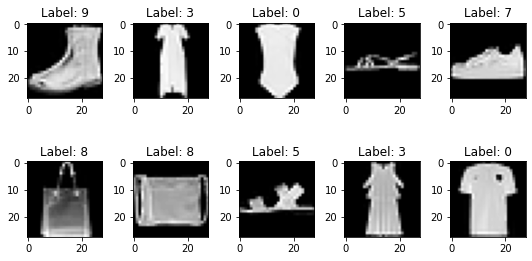

In [14]:
def plot_samples():
  a, _, _ = get_fashion_mnist_dataloaders()
  num_row = 2
  num_col = 5# plot images
  num_images = num_row * num_col
  fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
  for i, (x,y) in enumerate(a):
      if i >= num_images:
        break
      ax = axes[i//num_col, i%num_col]
      x = (x.numpy().squeeze() * 255).astype(int)
      y = y.numpy()[0]
      ax.imshow(x, cmap='gray')
      ax.set_title(f"Label: {y}")
      
  plt.tight_layout()
  plt.show()
plot_samples()

## Fonctions à compléter

In [37]:
def accuracy(y, y_pred) :
    # Nombre d'éléments à classifier.
    card_D = y.shape[0]

    # Calcul du nombre d'éléments bien classifiés.
    y_pred_argmax = torch.argmax(y_pred, dim=1)
    y_argmax = torch.argmax(y, dim=1)

    card_C = (y_pred_argmax == y_argmax).sum()

    # Calcul de la précision de classification.
    acc = torch.div(card_C, card_D)

    return acc, (card_C, card_D)


def accuracy_and_loss_whole_dataset(data_loader, model):
    cardinal = 0
    loss     = 0.
    n_accurate_preds  = 0.

    for x, y in data_loader:
        x, y                  = reshape_input(x, y)
        y_pred                = model.forward(x)
        xentrp                = cross_entropy(y, y_pred)
        _, (n_acc, n_samples) = accuracy(y, y_pred)

        cardinal = cardinal + n_samples
        loss     = loss + xentrp
        n_accurate_preds  = n_accurate_preds + n_acc

    loss = loss / float(cardinal)
    acc  = n_accurate_preds / float(cardinal)

    return acc, loss


def cross_entropy(y, y_pred): 
    loss = - torch.sum(y * torch.log(torch.clip(y_pred, min=1e-5)))
    
    return loss


def softmax(x, axis=-1):
    max, index = torch.max(x, dim=1)
    exp_x = torch.exp(x - max[:,None])
    sum = torch.sum(exp_x, dim=axis, keepdim=True)
    values = torch.div(exp_x, sum)

    return values


def inputs_tilde(x, axis=-1):
    one_vec = torch.ones(x.shape[0], 1)
    x_tilde = torch.cat([x, one_vec], dim=1)

    return x_tilde

In [38]:
class LinearModel:
    def __init__(self, num_features, num_classes):
      self.params = torch.normal(0, 0.01, (num_features + 1, num_classes))
      self.t = 0 
      self.m_t = 0 
      self.v_t = 0
      self.beta_1 = 0.9
      self.beta_2 = 0.999
      self.epsilon = 10e-8

        
    def forward(self, x):
      inputs = inputs_tilde(x)
      outputs = softmax(torch.matmul(inputs, self.params))

      return outputs


    def get_grads(self, y, y_pred, X): 
      x = inputs_tilde(X)
      grads = torch.matmul(x.T, y_pred) - torch.matmul(x.T, y)

      return grads


    def sgd_update(self, lr, grads):
      self.params = self.params - lr * grads
    

    def adam_update(self, lr, grads):
      self.t += 1
      self.m_t = self.beta_1 * self.m_t + (1 - self.beta_1) * grads
      self.v_t = self.beta_2 * self.v_t + (1 - self.beta_2) * torch.pow(grads, 2)
      m_hat_t = self.m_t / (1 - self.beta_1 ** self.t)
      v_hat_t = self.v_t / (1 - self.beta_2 ** self.t)
      self.params = self.params - lr * m_hat_t / (torch.sqrt(v_hat_t) + self.epsilon)


def train(model, lr=0.1, nb_epochs=10, sgd=True, data_loader_train=None, data_loader_val=None):
    best_model = None
    best_val_accuracy = 0
    best_params = None
    best_accuracy = 0
    logger = Logger()

    for epoch in range(nb_epochs+1):
        # at epoch 0 evaluate random initial model
        #   then for subsequent epochs, do optimize before evaluation.
        if epoch > 0:
          for x, y in data_loader_train:
              x, y = reshape_input(x, y)
              y_pred = model.forward(x)
              loss = cross_entropy(y, y_pred)
              grads = model.get_grads(y, y_pred, x)
              if sgd:
                model.sgd_update(lr, grads)
              else:
                model.adam_update(lr, grads)
        
        accuracy_train, loss_train = accuracy_and_loss_whole_dataset(data_loader_train, model)
        accuracy_val, loss_val = accuracy_and_loss_whole_dataset(data_loader_val, model)
        
        if accuracy_val > best_accuracy:
          best_accuracy = accuracy_val
          best_params = model.params
          best_model = model

        logger.log(accuracy_train, loss_train, accuracy_val, loss_val)
        if epoch % 1 == 0: # prints every 5 epochs, you can change it to % 1 for example to print each epoch
          print(f"Epoch {epoch:2d}, \
                  Train: loss={loss_train.item():.3f}, accuracy={accuracy_train.item()*100:.1f}%, \
                  Valid: loss={loss_val.item():.3f}, accuracy={accuracy_val.item()*100:.1f}%", flush=True)

    return best_model, best_accuracy, logger


## Évaluation

### SGD: Recherche d'hyperparamètres

In [22]:
# SGD
# Montrez les résultats pour différents taux d'apprentissage, e.g. 0.1, 0.01, 0.001, et différentes tailles de mini-batch, e.g. 1, 20, 200, 1000.
batch_size_list = [64, 256, 512]   # Define ranges in a list
lr_list = [0.001, 0.0001, 0.00001]           # Define ranges in a list

with torch.no_grad():
  for lr in lr_list:
    for batch_size in batch_size_list:
      print("------------------------------------------------------------------")
      print("Training model with a learning rate of {0} and a batch size of {1}".format(lr, batch_size))
      data_loader_train, data_loader_val, data_loader_test = get_fashion_mnist_dataloaders(val_percentage=0.1, batch_size=batch_size)
      
      model = LinearModel(num_features=784, num_classes=10)
      _, val_accuracy, _ = train(model,lr=lr, nb_epochs=5, sgd=True, data_loader_train=data_loader_train, data_loader_val=data_loader_val)
      print(f"validation accuracy = {val_accuracy*100:.3f}")

------------------------------------------------------------------
Training model with a learning rate of 0.001 and a batch size of 64


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch  0,                   Train: loss=2.311, accuracy=11.8%,                   Valid: loss=2.309, accuracy=11.6%
Epoch  1,                   Train: loss=0.531, accuracy=82.5%,                   Valid: loss=0.532, accuracy=82.3%
Epoch  2,                   Train: loss=0.494, accuracy=83.1%,                   Valid: loss=0.489, accuracy=83.5%
Epoch  3,                   Train: loss=0.462, accuracy=84.4%,                   Valid: loss=0.458, accuracy=84.2%
Epoch  4,                   Train: loss=0.445, accuracy=84.9%,                   Valid: loss=0.444, accuracy=84.6%
Epoch  5,                   Train: loss=0.442, accuracy=84.9%,                   Valid: loss=0.444, accuracy=84.5%
validation accuracy = 84.567
------------------------------------------------------------------
Training model with a learning rate of 0.001 and a batch size of 256
Epoch  0,                   Train: loss=2.322, accuracy=10.1%,                   Valid: loss=2.319, accuracy=9.6%
Epoch  1,                   Tra

#### **Tableau pour la précision sur l'ensemble de validation**
N.B. que les lignes correspondent aux valeurs du taux d'apprentisage et les colonnes correspondent au valeur du batch size. Les valeurs ci-dessous sont donné comme exemples; remplacez-les par les valeurs que vous avez utilisées pour votre recherche d'hyperparamètres.

learning rate\batch_size  | 64 | 256 | 512
-------------------|------------------|------------------|------------------|
**0.1**   | 84.567  | 83.983 | 83.900 |
**0.01** | 81.800  | 81.283 | 81.200 |
**0.001**  | 69.650  | 69.650 | 69.867 |

### SGD: Analyse du meilleur modèle

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch  0,                   Train: loss=2.306, accuracy=7.3%,                   Valid: loss=2.306, accuracy=7.0%
Epoch  1,                   Train: loss=2.016, accuracy=80.2%,                   Valid: loss=2.043, accuracy=79.8%
Epoch  2,                   Train: loss=1.572, accuracy=83.8%,                   Valid: loss=1.638, accuracy=83.1%
Epoch  3,                   Train: loss=1.963, accuracy=80.6%,                   Valid: loss=2.021, accuracy=80.3%
Epoch  4,                   Train: loss=1.678, accuracy=83.2%,                   Valid: loss=1.761, accuracy=82.5%
Epoch  5,                   Train: loss=1.649, accuracy=83.5%,                   Valid: loss=1.802, accuracy=82.2%
Epoch  6,                   Train: loss=1.564, accuracy=84.4%,                   Valid: loss=1.657, accuracy=83.3%
Epoch  7,                   Train: loss=2.204, accuracy=78.9%,                   Valid: loss=2.210, accuracy=78.7%
Epoch  8,                   Train: loss=1.586, accuracy=84.1%,                   V

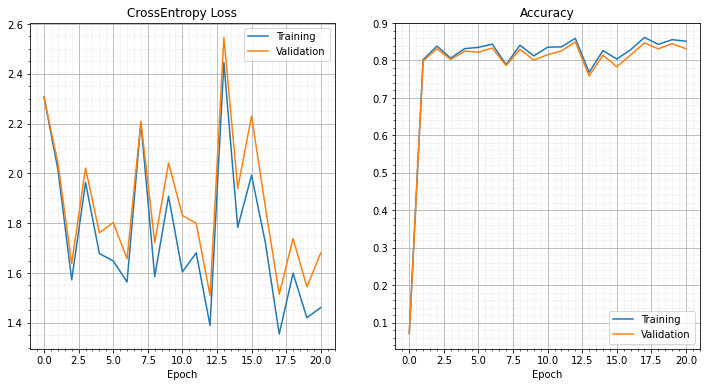

In [39]:
# SGD
# Montrez les résultats pour la meilleure configuration trouvez ci-dessus.
batch_size = 64 # TODO: Vous devez modifier cette valeur avec la meilleur que vous avez eu.
lr = 0.1 # TODO: Vous devez modifier cette valeur avec la meilleur que vous avez eu.

with torch.no_grad():
  data_loader_train, data_loader_val, data_loader_test = get_fashion_mnist_dataloaders(val_percentage=0.1, batch_size=batch_size)

  model = LinearModel(num_features=784, num_classes=10)
  best_model, best_val_accuracy, logger = train(model,lr=lr, nb_epochs=20, sgd=True, data_loader_train=data_loader_train, data_loader_val=data_loader_val)
  logger.plot_loss_and_accuracy()
  print(f"Best validation accuracy = {best_val_accuracy*100:.3f}")

  accuracy_test, loss_test = accuracy_and_loss_whole_dataset(data_loader_test, best_model)
print("Evaluation of the best training model over test set")
print("------")
print(f"Loss : {loss_test:.3f}")
print(f"Accuracy : {accuracy_test*100.:.3f}")

### Adam: Recherche d'hyperparamètres

Implémentez Adam, répétez les deux étapes précédentes (recherche d'hyperparamètres et analyse du meilleur modèle) cette fois en utilisat Adam, et comparez les performances finales avec votre meilleur modèle SGD.

In [23]:
# ADAM
# Montrez les résultats pour différents taux d'apprentissage, e.g. 0.1, 0.01, 0.001, et différentes tailles de mini-batch, e.g. 1, 20, 200, 1000.
batch_size_list = [64, 256, 512]   # Define ranges in a list
lr_list = [0.01, 0.001, 0.0001] # Define ranges in a list

with torch.no_grad():
  for lr in lr_list:
    for batch_size in batch_size_list:
      print("------------------------------------------------------------------")
      print("Training model with a learning rate of {0} and a batch size of {1}".format(lr, batch_size))
      data_loader_train, data_loader_val, data_loader_test = get_fashion_mnist_dataloaders(val_percentage=0.1, batch_size=batch_size)
      
      model = LinearModel(num_features=784, num_classes=10)
      _, val_accuracy, _ = train(model,lr=lr, nb_epochs=5, sgd=False, data_loader_train=data_loader_train, data_loader_val=data_loader_val)
      print(f"validation accuracy = {val_accuracy*100:.3f}")

------------------------------------------------------------------
Training model with a learning rate of 0.01 and a batch size of 64


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch  0,                   Train: loss=2.331, accuracy=6.7%,                   Valid: loss=2.331, accuracy=6.4%
Epoch  1,                   Train: loss=0.461, accuracy=84.0%,                   Valid: loss=0.482, accuracy=83.6%
Epoch  2,                   Train: loss=0.421, accuracy=85.9%,                   Valid: loss=0.446, accuracy=85.5%
Epoch  3,                   Train: loss=0.514, accuracy=82.6%,                   Valid: loss=0.544, accuracy=82.3%
Epoch  4,                   Train: loss=0.632, accuracy=80.0%,                   Valid: loss=0.664, accuracy=79.6%
Epoch  5,                   Train: loss=0.417, accuracy=86.0%,                   Valid: loss=0.487, accuracy=84.8%
validation accuracy = 85.467
------------------------------------------------------------------
Training model with a learning rate of 0.01 and a batch size of 256
Epoch  0,                   Train: loss=2.285, accuracy=19.2%,                   Valid: loss=2.286, accuracy=18.9%
Epoch  1,                   Train

#### **Tableau pour la précision sur l'ensemble de validation**
N.B. que les lignes correspondent aux valeurs du taux d'apprentisage et les colonnes correspondent au valeur du batch size. Les valeurs ci-dessous sont donné comme exemples; remplacez-les par les valeurs que vous avez utilisées pour votre recherche d'hyperparamètres.

learning rate\batch_size  | 64 | 256 | 512 
-------------------|------------------|------------------|------------------|
**0.01**    | 85.467  | 85.067 | 85.250 |
**0.001**   | 84.817  | 84.683 | 84.150 |
**0.0001**  | 81.833  | 76.550 | 72.233 |

### Adam: Analyse du meilleur modèle

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch  0,                   Train: loss=2.301, accuracy=12.9%,                   Valid: loss=2.303, accuracy=12.6%
Epoch  1,                   Train: loss=0.499, accuracy=83.6%,                   Valid: loss=0.514, accuracy=82.9%
Epoch  2,                   Train: loss=0.441, accuracy=85.2%,                   Valid: loss=0.477, accuracy=84.9%
Epoch  3,                   Train: loss=0.415, accuracy=85.7%,                   Valid: loss=0.463, accuracy=84.1%
Epoch  4,                   Train: loss=0.420, accuracy=85.3%,                   Valid: loss=0.478, accuracy=84.0%
Epoch  5,                   Train: loss=0.413, accuracy=85.7%,                   Valid: loss=0.466, accuracy=84.2%
Epoch  6,                   Train: loss=0.497, accuracy=82.7%,                   Valid: loss=0.563, accuracy=81.7%
Epoch  7,                   Train: loss=0.391, accuracy=86.9%,                   Valid: loss=0.460, accuracy=85.2%
Epoch  8,                   Train: loss=0.447, accuracy=85.0%,                  

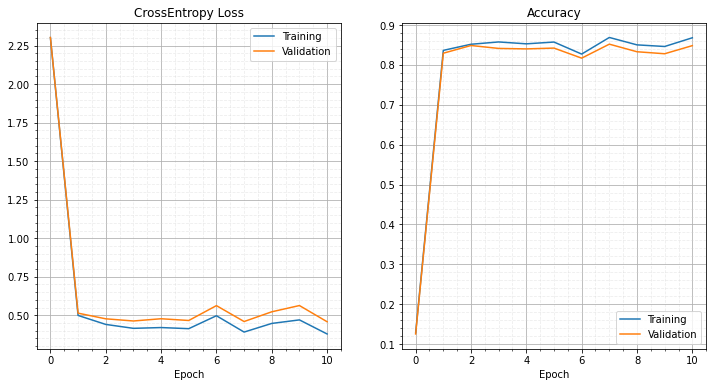

In [32]:
# ADAM
# Montrez les résultats pour la meilleure configuration trouvez ci-dessus.
batch_size = 64 # TODO: Vous devez modifier cette valeur avec la meilleur que vous avez eu.
lr = 0.01         # TODO: Vous devez modifier cette valeur avec la meilleur que vous avez eu.

with torch.no_grad():
  data_loader_train, data_loader_val, data_loader_test = get_fashion_mnist_dataloaders(val_percentage=0.1, batch_size=batch_size)

  model = LinearModel(num_features=784, num_classes=10)
  best_model, best_val_accuracy, logger = train(model,lr=lr, nb_epochs=10, sgd=False, 
                                                data_loader_train=data_loader_train, data_loader_val=data_loader_val)
  logger.plot_loss_and_accuracy()
  print(f"Best validation accuracy = {best_val_accuracy*100:.3f}")

  accuracy_test, loss_test = accuracy_and_loss_whole_dataset(data_loader_test, best_model)
print("Evaluation of the best training model over test set")
print("------")
print(f"Loss : {loss_test:.3f}")
print(f"Accuracy : {accuracy_test*100.:.3f}")

### Analyse des Résultats

### SDG
Un modèle de régression logistique a été implémenté et plusieurs configurations de paramètres ont été testées afin de trouver le modèle faisant la meilleure prédiction. Les learning rate testé ont élé 0.1, 0.01 et 0.001 avec des batch size de 64, 128 et 512. Parmi ces différentes valeurs que ces deux paramètres pouvaient prendre, le meilleur résultat trouvé avec l'actualisation des paramètres SDG est un learning rate de 0.1 avec un batch size de 64. La précision sur l'ensemble de se modèle est de 85.5%. De plus, lorsque le nombre d'époques pour se modèle a été augmenté, le modèle avait tendance à overfitter les données. 

### ADAM
Par la suite, la même recherche de paramètre a été effectuée, mais cette fois si avec la mise à jour des paramètres avec l'optimisation de Adam. Encore une fois, la meilleure configuration trouvée est un learning rate de 0.01 avec un batch size de 64. Encore une fois, l'augmentation du  nombre d'époques avec la meilleure solution trouvée n'a pas permis d'améliorer les résultats. Dans les graphiques de la section précédente sur ADAM, on remarque qu'après quelque époque, le modèle commence à overfit tranquillement.

# Partie 3 (20 points)

Pour cette partie, vous pouvez travailler en groupes de 2, mais il faut écrire sa propre dérivation et soumettre son propre rapport. Si vous travaillez avec un partenaire, il faut indiquer leur nom dans votre rapport.

### Problème

![picture](https://drive.google.com/uc?id=17_N7pIrf5pypQKiUh5cM7SX6raZUBcJC)

Considérons maintenant un réseau de neurones avec une couche d'entrée avec $D=784$ unités, $L$ couches cachées, chacune avec 300 unités et un vecteur de sortie $\mathbf{y}$ de dimension $K$. Vous avez $i = 1, .., N$ exemples dans un ensemble d'apprentissage, où chaque ${\bf x}_i \in \mathbb{R}^{784}$ est un vecteur de caractéristiques (features). $\mathbf{y}$ est un vecteur du type *one-hot* -- un vecteur de zéros avec un seul 1 pour indiquer que la classe $C=k$ dans la dimension $k$. Par exemple, le vecteur $\mathbf{y}=[0, 1, 0, \cdots, 0]^T$ représente la deuxième classe. La fonction de perte est donnée par
\begin{equation}
\mathcal{L} = -\sum_{i=1}^{N}\sum_{k=1}^{K}y_{k,i}\log (f_k( {\bf x}_i )  ) 
\end{equation}

La fonction d'activation de la couche finale a la forme  ${\bf f} = [f_1, ..., f_K]$ donné par la fonction d'activation softmax: 
\begin{equation}
f_k( {\bf a}^{(L+1)}({\bf x}_i) ) = \frac{\exp(a_k^{(L+1)})}{\sum_{c=1}^{K}\exp(a_c^{(L+1)})}, \;\;\;\;
\nonumber
\end{equation}

et les couches cachées utilisent une fonction d'activation de type ReLU:
\begin{equation}
  {\bf h}^{(l)}({\bf a}^{(l)}({\bf x}_i)) = \text{ReLU}({\bf a}^{(l)}({\bf x}_i) = \max\Big(0, \, \, {\bf a}^{(l)}({\bf x}_i)\Big)
\end{equation}

où ${\bf a}^{(l)}$ est le vecteur résultant du calcul de la préactivation habituelle ${\bf a}^{(l)}={\bf W}^{(l)}{\bf h}^{(l-1)} + {\bf b}^{(l)}$, qui pourrait être simplifiée à ${\boldsymbol \theta}^{(l)}\tilde{\bf h}^{(l-1)}$ en utilisant l'astuce de définir $\tilde{\bf h}$ comme ${\bf h}$ avec un 1 concaténé à la fin du vecteur.



### Questions

* a) (10 points) Donnez le pseudocode incluant des *calculs matriciels—vectoriels* détaillés pour l'algorithme de rétropropagation pour calculer le gradient pour les paramètres de chaque couche **étant donné un exemple d'entraînement**.

* b) (10 points) 
Implémentez l'optimisation basée sur le gradient de ce réseau en Pytorch.
Utilisez le code squelette ci-dessous comme point de départ et implémentez les mathématiques de l'algorithme de rétropropagation que vous avez décrit à la question précédente.Utilisez encore l'ensemble de données de Fashion MNIST (voir Partie 2). **Comparez différents modèles ayant différentes largeurs (nombre d'unités) et profondeurs (nombre de couches)**. Ici encore, n'utilisez l'ensemble de test que pour votre expérience finale lorsque vous pensez avoir obtenu votre meilleur modèle.

**IMPORTANT**

L'objectif du TP est de vous faire implémenter la rétropropagation à la main. **Il est donc interdit d'utiliser les capacités de construction de modèles ou de différentiation automatique de pytorch -- par exemple, aucun appels à torch.nn, torch.autograd ou à la méthode .backward().** L'objectif est d'implémenter un modèle de classification logistique ainsi que son entainement en utilisant uniquement des opérations matricielles de base fournies par PyTorch e.g. torch.sum(), torch.matmul(), etc.

## Votre pseudocode:

#### Algorithme de rétropopagation dans un réseau de neurones pour un exemple $\tilde{x}_i$:

Répéter:

$\hspace{5 mm}$ # Forward pass

$\hspace{5 mm}$ $\pmb{h}^{(0)} = \tilde{x}_i$

$\hspace{5 mm}$ Pour $l$ de $1 \to L$:

$\hspace{10 mm}$ $\pmb{a}^{(l)} = \pmb{W}^{(l)} \pmb{h}^{(l-1)} + \pmb{b}$

$\hspace{10 mm}$ $\pmb{h}^{(l)} = σ(\pmb{a}^{(l)})$ $\hspace{40 mm}$## Ou σ est ReLU pour $l \not= L$ et softmax pour $l = L$

$\hspace{5 mm}$ # Backward pass

$\hspace{5 mm}$ $\pmb{δ}^{L} = ∇_hL_x \odot σ'(\pmb{a}^l)$ $\hspace{28 mm}$## Éguale à $one\_hot_{prediction} - one\_hot_{vrai\_valeur}  $ dans notre cas.

$\hspace{5 mm}$ $\frac{∂\mathbf{L}}{∂ \mathbf{W^L}} = \pmb{h}^{l-1}\pmb{δ}^{L}$

$\hspace{5 mm}$ Pour $l$ de $(L-1) \to 1$:

$\hspace{10 mm}$ $\pmb{δ}^{l} = ((\pmb{W}^{(l+1)})^T \pmb{δ}^{l+1}) ⊙ σ'(\pmb{a}^l)$ $\hspace{3 mm}$## σ' est la dérivé de ReLU soit 0 si $a^{l}_{i} ≤ 0$ et 1 sinon

$\hspace{10 mm}$ $\frac{∂\mathbf{L}}{∂ \mathbf{W^l}} = \pmb{h}^{l-1}\pmb{δ}^{l}$


## Fonctions à compléter

In [34]:
''' Les fonctions dans cette cellule peuvent avoir les mêmes déclarations que celles de la partie 2''' 
def accuracy(y, y_pred):
    # Nombre d'éléments à classifier.
    card_D = y.shape[0]

    # Calcul du nombre d'éléments bien classifiés.
    y_pred_argmax = torch.argmax(y_pred, dim=1)
    y_argmax = torch.argmax(y, dim=1)
    card_C = (y_pred_argmax == y_argmax).sum()

    # Calcul de la précision de classification.
    acc = torch.div(card_C, card_D)

    return acc, (card_C, card_D)


def accuracy_and_loss_whole_dataset(data_loader, model):
    cardinal = 0
    loss = 0.
    n_accurate_preds = 0.

    for x, y in data_loader:
        x, y = reshape_input(x, y)
        y_pred = model.forward(x)
        xentrp = cross_entropy(y, y_pred)
        _, (n_acc, n_samples) = accuracy(y, y_pred)

        cardinal = cardinal + n_samples
        loss = loss + xentrp
        n_accurate_preds = n_accurate_preds + n_acc

    loss = loss / float(cardinal)
    acc = n_accurate_preds / float(cardinal)

    return acc, loss


def inputs_tilde(x, axis=-1):
    # Augments the inputs `x` with ones along `axis`
    one_vec = torch.ones(x.size(axis-1), 1).T
    x_tilde = torch.cat([x, one_vec], dim=axis)
    return x_tilde


def softmax(x, axis=-1):
    max_value, index = torch.max(x, dim=1)
    exp_x = torch.exp(x - max_value[:, None])
    sum = torch.sum(exp_x, dim=axis, keepdim=True)
    values = torch.div(exp_x, sum)

    return values


def cross_entropy(y, y_pred):
    loss = - torch.sum(y * torch.log(torch.clip(y_pred, min=1e-5)))

    return loss


def softmax_cross_entropy_backward(y, y_pred):
    values = y_pred - y
    return values


def relu_forward(x):
    values = torch.max(torch.zeros(x.shape), x)

    return values


def relu_backward(x):
    x[x <= 0] = 0
    x[x >= 0] = 1
    values = x
    return values


class MLPModel:
    def __init__(self, n_features, n_hidden_features, n_hidden_layers, n_classes):
        self.n_features = n_features
        self.n_hidden_features = n_hidden_features
        self.n_hidden_layers = n_hidden_layers
        self.n_classes = n_classes

        # Init params
        if self.n_hidden_layers == 0:
            # y: N_input + 1 bias X n_classes
            self.params = [torch.normal(0, 0.1, (n_classes, n_features + 1))]
        else:
            # pour h_1: N_input + 1 bias X h_1_neurone
            #      h_L: N_h_L-1_neurone + 1 bias X h_L_neurone  (Pour L > 1)
            #      y: N_h_L-1_neurone + 1 bias X n_classes
            self.params = np.array(
                [torch.normal(0, 0.01, (n_hidden_features, n_features + 1))] +
                [torch.normal(0, 0.01, (n_hidden_features, n_hidden_features + 1))] * (n_hidden_layers - 1) +
                [torch.normal(0, 0.01, (n_classes, n_hidden_features + 1))]
            )

        print(f"Teta params={[p.shape for p in self.params]}")

        self.a = []  # liste contenant le resultat des multiplications matricielles
        self.h = []  # liste contenant le resultat des fonctions d'activations

        self.t = 0
        self.m_t = [torch.zeros(param.size()) for param in self.params]
        self.v_t = [torch.zeros(param.size()) for param in self.params]
        self.beta_1 = 0.9
        self.beta_2 = 0.999
        self.epsilon = 10e-8

    def forward(self, x):
        # print("~~~~~~~~~~~~~~~~ FORWARD ~~~~~~~~~~~~~~~~")

        # Clear params of previous forward
        self.a.clear()
        self.h.clear()

        # Add the bias to the input
        outputs = x.T
        self.h.append(outputs)

        # Forward through the NN
        for i, params in enumerate(self.params):

            # Add bias to the previous output
            outputs = inputs_tilde(outputs, axis=0)

            # a = W * x + b
            a = torch.matmul(params, outputs)

            # outputs = ReLU(a) or Softmax(a)
            if i == len(self.params) - 1:
                outputs = softmax(a.T)
            else:
                outputs = relu_forward(a)
                self.a.append(a)
                self.h.append(outputs)

        # Return the prediction
        return outputs

    def backward(self, y, y_pred):
        # print("~~~~~~~~~~~~~~~~ BACKWARD ~~~~~~~~~~~~~~~~")
        y = y.T
        y_pred = y_pred.T

        # List to save the gradient
        grads = [None] * len(self.h)

        # Last layer

        """ delta = nabla Hadamard_product act_func_derivative(w_l * h_l-1 + b) """
        delta = softmax_cross_entropy_backward(y, y_pred)

        """ dC/dw_l = h_l-1 * delta_l """
        grads[-1] = torch.matmul(delta, inputs_tilde(self.h[-1], axis=0) .T)             # Weight + bias update

        # From here, we need to apply the chain rule -  Loop backward
        for i in range(self.n_hidden_layers-1, -1, -1):
            """ delta_l = ((w_l+1).T * delta_l+1) element_wise_mul act_func_derivative(w_l * a_l-1 + b) """
            relu_back = relu_backward(self.a[i])
            # Find delta for the current layer
            delta = torch.matmul(self.params[i+1].T, delta)
            # Remove the bias "node" from the following layer
            delta = delta[torch.arange(delta.size(0)) != delta.size(0) - 1]
            # dx * relu_back
            delta = delta * relu_back

            """ dC/dw_l = h_l-1 * delta_l """
            grads[i] = torch.matmul(delta, inputs_tilde(self.h[i], axis=0).T)            # Weight + bias update

        return grads

    def sgd_update(self, lr, grads):
        for i, grad in enumerate(grads):
            self.params[i] -= lr * grad

    def adam_update(self, lr, grads):
        for i, grad in enumerate(grads):
            self.t += 1
            self.m_t[i] = self.beta_1 * self.m_t[i] + (1 - self.beta_1) * grad
            self.v_t[i] = self.beta_2 * self.v_t[i] + (1 - self.beta_2) * torch.pow(grad, 2)
            m_hat_t = self.m_t[i] / (1 - self.beta_1 ** self.t)
            v_hat_t = self.v_t[i] / (1 - self.beta_2 ** self.t)
            self.params[i] -= lr * m_hat_t / (torch.sqrt(v_hat_t) + self.epsilon)


def train(model, lr=0.1, nb_epochs=10, sgd=True, data_loader_train=None, data_loader_val=None):
    best_model = None
    best_params = None
    best_val_accuracy = 0
    logger = Logger()

    for epoch in range(nb_epochs + 1):

        # at epoch 0 evaluate random initial model
        #   then for subsequent epochs, do optimize before evaluation.
        if epoch > 0:
            for x, y in data_loader_train:
                x, y = reshape_input(x, y)

                y_pred = model.forward(x)
                grads = model.backward(y, y_pred)
                if sgd:
                    model.sgd_update(lr, grads)
                else:
                    model.adam_update(lr, grads)

        accuracy_train, loss_train = accuracy_and_loss_whole_dataset(data_loader_train, model)
        accuracy_val, loss_val = accuracy_and_loss_whole_dataset(data_loader_val, model)

        if accuracy_val > best_val_accuracy:
            best_model = model
            best_val_accuracy = accuracy_val

        logger.log(accuracy_train, loss_train, accuracy_val, loss_val)
        if epoch % 1 == 0:  # prints every 5 epochs, you can change it to % 1 for example to print each epoch
            print(f"Epoch {epoch:2d}, \
                  Train:loss={loss_train.item():.3f}, accuracy={accuracy_train.item() * 100:.1f}%, \
                  Valid: loss={loss_val.item():.3f}, accuracy={accuracy_val.item() * 100:.1f}%", flush=True)

    return best_model, best_val_accuracy, logger


## Évaluation

### SGD: Recherche d'hyperparamètres

In [25]:
# SGD
# Montrez les résultats pour différents nombre de couche, e.g. 1, 3, 5, et différent nombres de neurone, e.g. 25, 100, 300, 500, 1000.
depth_list = [1, 2, 3]   # Define ranges in a list
width_list = [10, 100, 500]       # Define ranges in a list
lr = 0.0001                         # Some value
batch_size = 64                    # Some value

with torch.no_grad():
  for depth in depth_list:
    for width in width_list:
      print("------------------------------------------------------------------")
      print("Training model with a depth of {0} layers and a width of {1} units".format(depth, width))
      data_loader_train, data_loader_val, data_loader_test = get_fashion_mnist_dataloaders(val_percentage=0.1, batch_size=batch_size)
      
      MLP_model = MLPModel(n_features=784, n_hidden_features=width, n_hidden_layers=depth, n_classes=10)
      _, val_accuracy, _ = train(MLP_model,lr=lr, nb_epochs=5, sgd=True, data_loader_train=data_loader_train, data_loader_val=data_loader_val)
      print(f"validation accuracy = {val_accuracy*100:.3f}")

------------------------------------------------------------------
Training model with a depth of 1 layers and a width of 10 units
Teta params=[torch.Size([10, 785]), torch.Size([10, 11])]


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:96: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
/usr/local/lib/python3.7/

Epoch  0,                   Train:loss=2.302, accuracy=9.8%,                   Valid: loss=2.302, accuracy=10.3%
Epoch  1,                   Train:loss=1.822, accuracy=25.1%,                   Valid: loss=1.821, accuracy=24.9%
Epoch  2,                   Train:loss=1.267, accuracy=52.0%,                   Valid: loss=1.251, accuracy=52.8%
Epoch  3,                   Train:loss=1.086, accuracy=56.9%,                   Valid: loss=1.070, accuracy=56.4%
Epoch  4,                   Train:loss=0.950, accuracy=62.9%,                   Valid: loss=0.935, accuracy=63.2%
Epoch  5,                   Train:loss=0.861, accuracy=66.5%,                   Valid: loss=0.847, accuracy=67.2%
validation accuracy = 67.150
------------------------------------------------------------------
Training model with a depth of 1 layers and a width of 100 units
Teta params=[torch.Size([100, 785]), torch.Size([10, 101])]
Epoch  0,                   Train:loss=2.302, accuracy=15.2%,                   Valid: loss=2.30

#### **Tableau pour la précision sur l'ensemble de validation**
N.B. que les lignes correspondent aux nombre de couche et les colonnes correspondent au nombre de neurone dans chaque couche. Les valeurs ci-dessous sont donné comme exemples; remplacez-les par les valeurs que vous avez utilisées pour votre recherche d'hyperparamètres.

depth\width  | 10 | 100 | 500 |
-------------------|------------------|------------------|------------------|
**1**   | 67.150  | 76.117 | 79.583 |
**2**   | 12.750  | 54.667 | 76.117 |
**3**   | 10.167  | 9.717 | 52.867 |

### SGD: Analyse du meilleur modèle

Teta params=[torch.Size([500, 785]), torch.Size([10, 501])]


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:96: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
/usr/local/lib/python3.7/

Epoch  0,                   Train:loss=2.301, accuracy=13.9%,                   Valid: loss=2.301, accuracy=13.5%
Epoch  1,                   Train:loss=1.125, accuracy=64.3%,                   Valid: loss=1.122, accuracy=65.4%
Epoch  2,                   Train:loss=0.825, accuracy=68.9%,                   Valid: loss=0.819, accuracy=69.9%
Epoch  3,                   Train:loss=0.717, accuracy=74.8%,                   Valid: loss=0.712, accuracy=74.9%
Epoch  4,                   Train:loss=0.651, accuracy=77.5%,                   Valid: loss=0.645, accuracy=77.2%
Epoch  5,                   Train:loss=0.606, accuracy=79.4%,                   Valid: loss=0.601, accuracy=79.0%
Epoch  6,                   Train:loss=0.572, accuracy=80.6%,                   Valid: loss=0.568, accuracy=80.2%
Epoch  7,                   Train:loss=0.546, accuracy=81.6%,                   Valid: loss=0.544, accuracy=80.9%
Epoch  8,                   Train:loss=0.527, accuracy=82.1%,                   Valid: l

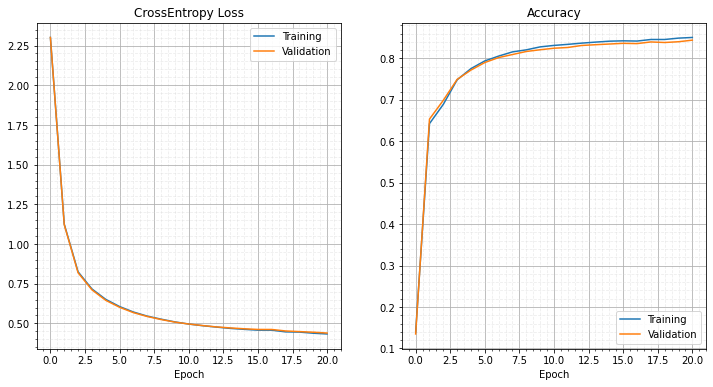

In [36]:
# SGD
# Montrez les résultats pour la meilleure configuration trouvez ci-dessus.
depth = 1     # TODO: Vous devez modifier cette valeur avec la meilleur que vous avez eu.
width = 500    # TODO: Vous devez modifier cette valeur avec la meilleur que vous avez eu.
lr = 0.0001           # Some value
batch_size = 64   # Some value

with torch.no_grad():
  data_loader_train, data_loader_val, data_loader_test = get_fashion_mnist_dataloaders(val_percentage=0.1, batch_size=batch_size)

  MLP_model = MLPModel(n_features=784, n_hidden_features=width, n_hidden_layers=depth, n_classes=10)
  best_model, best_val_accuracy, logger = train(MLP_model,lr=lr, nb_epochs=20, sgd=True, 
                                                data_loader_train=data_loader_train, data_loader_val=data_loader_val)
  logger.plot_loss_and_accuracy()
  print(f"Best validation accuracy = {best_val_accuracy*100:.3f}")

  accuracy_test, loss_test = accuracy_and_loss_whole_dataset(data_loader_test, best_model)
print("Evaluation of the best training model over test set")
print("------")
print(f"Loss : {loss_test:.3f}")
print(f"Accuracy : {accuracy_test*100.:.3f}")

In [ ]:
# Pour comparer
# SGD
# Montrez les résultats pour la meilleure configuration trouvez ci-dessus.
depth = 3     # TODO: Vous devez modifier cette valeur avec la meilleur que vous avez eu.
width = 500    # TODO: Vous devez modifier cette valeur avec la meilleur que vous avez eu.
lr = 0.0001           # Some value
batch_size = 64   # Some value

with torch.no_grad():
  data_loader_train, data_loader_val, data_loader_test = get_fashion_mnist_dataloaders(val_percentage=0.1, batch_size=batch_size)

  MLP_model = MLPModel(n_features=784, n_hidden_features=width, n_hidden_layers=depth, n_classes=10)
  best_model, best_val_accuracy, logger = train(MLP_model,lr=lr, nb_epochs=10, sgd=True, 
                                                data_loader_train=data_loader_train, data_loader_val=data_loader_val)
  logger.plot_loss_and_accuracy()
  print(f"Best validation accuracy = {best_val_accuracy*100:.3f}")

  accuracy_test, loss_test = accuracy_and_loss_whole_dataset(data_loader_test, best_model)
print("Evaluation of the best training model over test set")
print("------")
print(f"Loss : {loss_test:.3f}")
print(f"Accuracy : {accuracy_test*100.:.3f}")

### Adam: Recherche d'hyperparamètres

Implémentez Adam, répétez les deux étapes précédentes (recherche d'hyperparamètres et analyse du meilleur modèle) cette fois en utilisat Adam, et comparez les performances finales avec votre meilleur modèle SGD.

In [27]:
# ADAM
# Montrez les résultats pour différents nombre de couche, e.g. 1, 3, 5, et différent nombres de neurone, e.g. 25, 100, 300, 500, 1000.
depth_list = [1, 2, 3]            # Define ranges in a list
width_list = [10, 100, 500]       # Define ranges in a list
lr = 0.001                       # Some value
batch_size = 64                   # Some value

with torch.no_grad():
  for depth in depth_list:
    for width in width_list:
      print("------------------------------------------------------------------")
      print("Training model with a depth of {0} layers and a width of {1} units".format(depth, width))
      data_loader_train, data_loader_val, data_loader_test = get_fashion_mnist_dataloaders(val_percentage=0.1, batch_size=batch_size)
      
      MLP_model = MLPModel(n_features=784, n_hidden_features=width, n_hidden_layers=depth, n_classes=10)
      _, val_accuracy, _ = train(MLP_model, lr=lr, nb_epochs=10, sgd=False, data_loader_train=data_loader_train, data_loader_val=data_loader_val)
      print(f"validation accuracy = {val_accuracy*100:.3f}")

------------------------------------------------------------------
Training model with a depth of 1 layers and a width of 10 units
Teta params=[torch.Size([10, 785]), torch.Size([10, 11])]


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:96: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
/usr/local/lib/python3.7/

Epoch  0,                   Train:loss=2.303, accuracy=7.9%,                   Valid: loss=2.303, accuracy=8.3%
Epoch  1,                   Train:loss=0.640, accuracy=78.1%,                   Valid: loss=0.682, accuracy=76.6%
Epoch  2,                   Train:loss=0.578, accuracy=79.9%,                   Valid: loss=0.619, accuracy=78.9%
Epoch  3,                   Train:loss=0.564, accuracy=80.3%,                   Valid: loss=0.611, accuracy=79.0%
Epoch  4,                   Train:loss=0.546, accuracy=81.1%,                   Valid: loss=0.594, accuracy=79.6%
Epoch  5,                   Train:loss=0.540, accuracy=81.4%,                   Valid: loss=0.591, accuracy=79.6%
Epoch  6,                   Train:loss=0.541, accuracy=81.5%,                   Valid: loss=0.590, accuracy=80.1%
Epoch  7,                   Train:loss=0.541, accuracy=81.5%,                   Valid: loss=0.588, accuracy=80.3%
Epoch  8,                   Train:loss=0.544, accuracy=81.1%,                   Valid: los

#### **Tableau pour la précision sur l'ensemble de validation**
N.B. que les lignes correspondent aux nombre de couche et les colonnes correspondent au nombre de neurone dans chaque couche. Les valeurs ci-dessous sont donné comme exemples; remplacez-les par les valeurs que vous avez utilisées pour votre recherche d'hyperparamètres.

depth\width  | 10 | 100 | 500 |
-------------------|------------------|------------------|------------------|
**1**   | 80.333  | 86.717 | 85.600 |
**2**   | 81.200  | 86.067 | 86.567 |
**3**   | 77.583  | 85.117 | 85.250 |

### Adam: Analyse du meilleur modèle

Teta params=[torch.Size([500, 785]), torch.Size([500, 501]), torch.Size([500, 501]), torch.Size([10, 501])]


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:96: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
/usr/local/lib/python3.7/

Epoch  0,                   Train:loss=2.303, accuracy=9.9%,                   Valid: loss=2.303, accuracy=10.7%
Epoch  1,                   Train:loss=0.577, accuracy=78.9%,                   Valid: loss=0.558, accuracy=79.8%
Epoch  2,                   Train:loss=0.480, accuracy=82.6%,                   Valid: loss=0.470, accuracy=83.7%
Epoch  3,                   Train:loss=0.453, accuracy=83.5%,                   Valid: loss=0.446, accuracy=84.0%
Epoch  4,                   Train:loss=0.432, accuracy=84.1%,                   Valid: loss=0.425, accuracy=84.7%
Epoch  5,                   Train:loss=0.413, accuracy=85.0%,                   Valid: loss=0.416, accuracy=85.0%
Epoch  6,                   Train:loss=0.404, accuracy=85.5%,                   Valid: loss=0.407, accuracy=85.6%
Epoch  7,                   Train:loss=0.403, accuracy=85.4%,                   Valid: loss=0.403, accuracy=85.5%
Epoch  8,                   Train:loss=0.385, accuracy=86.0%,                   Valid: lo

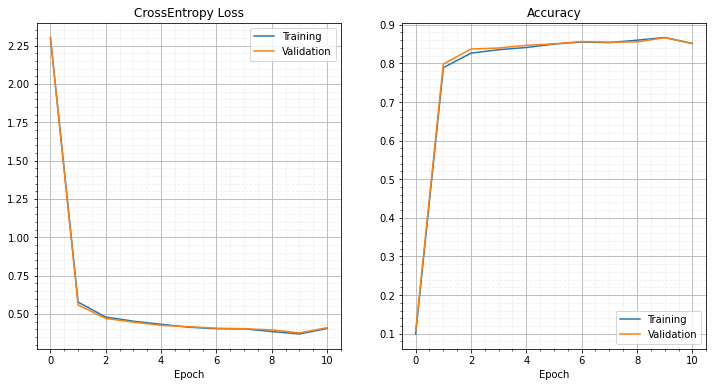

In [51]:
# ADAM
# Montrez les résultats pour la meilleure configuration trouvez ci-dessus.
depth = 3    
width = 500   
lr = 0.0001          
batch_size = 64   

with torch.no_grad():
  data_loader_train, data_loader_val, data_loader_test = get_fashion_mnist_dataloaders(val_percentage=0.1, batch_size=batch_size)

  MLP_model = MLPModel(n_features=784, n_hidden_features=width, n_hidden_layers=depth, n_classes=10)
  best_model, best_val_accuracy, logger = train(MLP_model,lr=lr, nb_epochs=10, sgd=False, 
                                                data_loader_train=data_loader_train, data_loader_val=data_loader_val)
  logger.plot_loss_and_accuracy()
  print(f"Best validation accuracy = {best_val_accuracy*100:.3f}")

  accuracy_test, loss_test = accuracy_and_loss_whole_dataset(data_loader_test, best_model)
print("Evaluation of the best training model over test set")
print("------")
print(f"Loss : {loss_test:.3f}")
print(f"Accuracy : {accuracy_test*100.:.3f}")

### Analyse des Résultats

Dans cette section, un réseau multicouche a été implémenté. Le réseau est composé de L couche cachée composée de D neurones par couche avec une fonction d'activation ReLU. La dernière couche du réseau comporte une fonction d'activation différente, soit Sfotmax dans le but de réaliser la classification.

### SDG
Tout d'abord, l'entrainement s'est fait avec SDG. Après plusieurs essais avec plusieurs learning rate, un learning rate plus petit que la section précédente a été choisie, car le réseau avait moins de chance d'avoir des neurones morts en atteignant le bas de la fonction ReLU. Par la suite, plusieurs configurations de couche ont été testées et la meilleure configuration trouvée a été 1 seul couche, mais avec 500 neurones. Cette architecture simple fait en sorte que le modèle est plus facile à entrainer. Pour améliorer les performances des réseaux multicouches, plusieurs améliorations peuvent être apportées comme ajouter de la régularisation, ajouter des sauts aléatoires dans le réseau pour réactiver les neurones morts (lorsque la dérivé de ReLU atteint 0, donner une petite chance de changer le 0 pour un 1), faire de l'augmentation de données et bien sûr, utiliser la mise à jour de paramètre avec l'optimisation ADAM.

### ADAM
Ensuite, le même processus a été refait avec la mise à jour des paramètres avec ADAM. Pour cette recherche, l'algorithme d'apprentissage a été roulé plus longtemps afin de voir si ce plus long apprentissage a un impact. Premièrement, on remarque que l'utilisation d'ADAM donne de bien meilleurs résultats pour lorsque le modèle atteint la même époque que SDG. De plus, l'assez rouler l'algorithme plus longtemps nous permet d'obtenir une précision de 86.717%, soit le modèle avec la meilleure performance trouvée durant se TP. 

Finalement, un modèle avec 3 couches cachées et 500 neurones par couche a été entrainé afin de visualiser le Loss et l'accuracy de ce modèle. On s'aperçoit que l'accuracy maximal obtenu par se modèle est de 86.6%. Plusieurs techniques mentionnées à la section précédente pourraient être utilisées pour améliorer ce résultat.